In [1]:
%matplotlib inline


In [2]:
from __future__ import (division, print_function, absolute_import)


# In[7]:

import math
import matplotlib.pyplot as plt 
import numpy as np
import healpy as hp
import pyfits as pf
import astropy as ap
import os
from scipy.special import eval_legendre  ##special scipy function


# In[8]:

# http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.io.readsav.html
# http://www.astrobetter.com/blog/2009/11/24/read-idl-save-files-into-python/


# In[4]:

import scipy
import scipy.io



# In[6]:

import os
os.getcwd()
os.chdir("/Users/evanbiederstedt/downloads")





# In[11]:

# In[8]:

patch_file = scipy.io.readsav('listpix_patch3.sav')


# In[ ]:




# In[9]:

type(patch_file)


# In[10]:

arr3 = patch_file['listpix_patch3']
#print(arr3)


# In[11]:

type(arr3)


# In[12]:

print(len(arr3)) # pixels total 12476


# In[13]:

smica_map = "COM_CompMap_CMB-smica_2048_R1.20.fits"


# In[ ]:




# In[14]:

nside=512
npix = 12*(nside**2) #total number of pixels, npix
LMAX = ((2*nside)) #maximum l of the power spectrum C_l
heal_npix = hp.nside2npix(nside) # Healpix calculated npix

print("The total number of pixels is " + str(npix))
print("The maximum ell of the power spectrum C_l set to lmax = 2*nside " +str(LMAX))
print("Healpix tells me total number of pixels npix is equal to " + str(heal_npix))


# In[15]:

mapread_smica = hp.read_map(smica_map, field=0)
#hp.mollview(mapread_camb512)
#hp.mollview(mapread_smica)
print("CMB map, Noise map")
smica_noise = hp.read_map(smica_map, field=1)
#hp.mollview(smica_noise)


# In[16]:

print(mapread_smica[:20])
print(smica_noise[:20])


# In[17]:

smica512 = hp.pixelfunc.ud_grade(mapread_smica, 512)
noise512 = hp.pixelfunc.ud_grade(smica_noise, 512)
print(smica512[:20])
print(noise512[:20])


# In[18]:

print(len(smica512))
print(len(noise512))


# In[ ]:




# In[19]:

# rename array for convenience
tempval = smica512

# Data:
#     tempval      # the array of pixel values, (3145728,)


# In[20]:

print(len(tempval))
print(tempval.shape)
tempval[:10]


# In[21]:

#
# We only wish to use the pixels defined in our patch
# These pixel indices are listed in arr3 such that total number pixels total 12476
#
# arr3: this defines pixel indices within patch
# 
# To access pixel indices within array of CMB pixels, just use tempval[arr3]
#
patch=smica512[arr3]
noisepatch = noise512[arr3]


# In[22]:

print(len(patch))
print(len(noisepatch))


# In[23]:

print(patch[:30])
print(noisepatch[:30])


# In[ ]:




# In[12]:

# For lmax = 1600, we must create an array of ell values, i.e. [0 1 2 3....1599 1600]
ell = np.arange(1601)
#print(ell)
# 
# Subtract the monopole and dipole, l=0, l=1
ellval = ell[2:]
#print(ellval)


# In[ ]:


768
The total number of pixels is 3145728
The maximum ell of the power spectrum C_l set to lmax = 2*nside 1024
Healpix tells me total number of pixels npix is equal to 3145728
NSIDE = 2048768
The total number of pixels is 3145728
The maximum ell of the power spectrum C_l set to lmax = 2*nside 1024
Healpix tells me total number of pixels npix is equal to 3145728
NSIDE = 2048
ORDERING = NESTED in fits file
Ordering converted to RING
ORDERING = NESTED in fits file
Ordering converted to RING
CMB map, Noise map
CMB map, Noise map
NSIDE = 2048
ORDERING = NESTED in fits file
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
Ordering converted to RING
[-149.29827881 -110.67951965  -97.61709595 -163.04072571 -176.72653198
 -120.62650299  -96.60706329  -85.72504425  -45.77533722  -81.54304504
 -138.88243103 -190.0241394  -198.08218384 -160.84889221 -103.28009033
  -83.06707001  -81.32474518  -63.77209091  -14.57890129  -20.42744637]
[-149.29827881 -110.67951965  -97.61709595

In [3]:

# In[13]:

PlM_50 = "cl_varyCDMlmax1600ptPlMat50fakesigma25.npy"
PlM_100 = "cl_varyCDMlmax1600ptPlMat100fakesigma25.npy"
PlM_150 = "cl_varyCDMlmax1600ptPlMat150fakesigma25.npy"

# In[14]:

data1 = np.load(PlM_50)
data2 = np.load(PlM_100)
data3 = np.load(PlM_150)


# In[15]:

print(data1.shape)
print(data2.shape)
print(data3.shape)


# In[16]:

type(data1)


# In[ ]:

ff = "CAMB_cl_varyCDMlmax1600.npy"

cell_array = np.load(ff)

print(cell_array.shape)


(550, 768, 768)
(549, 768, 768)
(500, 768, 768)
(40, 1599)(550, 768, 768)
(549, 768, 768)
(500, 768, 768)
(40, 1599)



In [4]:

PlMat_total = np.concatenate((data1, data2, data3))


# In[18]:

PlMat_total.shape


# In[ ]:




# In[19]:

PlMat = PlMat_total


# In[20]:

PlMat[2]


# In[ ]:

# Step 3: (2*l +1)/4pi from l=2 to l=lmax
#          [5/4pi 7/4pi 9/4pi 11/4pi .... 65/4pi ]
norm = ((2*ellval + 1))/(4*math.pi)
print(len(ellval))
print(norm.shape)
print(norm[2])



1599
(1599,)
0.716197243914
1599
(1599,)
0.716197243914


In [5]:

# Step 4: multiply 
#         [5/4pi*P_2(M) + 7/4pi*P_3(M) +...... + 65/4pi*P_32(M)]
#
# multiply PlMat by (2*l+1)/4pi, i.e. norm
norm_matrix = norm[:, None, None] * PlMat
# [5/4pi * P_2(M)  7/4pi * P_3(M) ....   65/4pi * P_32(M)]


# In[ ]:

print(norm_matrix.shape)


# In[ ]:

print(PlMat.shape)


# In[ ]:

# Step 5: multiply by theoretical CAMB values, [C_2 C_3    C_31 C_32]
#         [5/4pi**C_2* P_2(M) + 7/4pi*C_3* P_3(M) +...... + 65/4pi*C_32* P_32(M)]



(1599, 768, 768)
(1599, 768, 768)
(1599, 768, 768)
(1599, 768, 768)


In [6]:

# define pixel-value arrays
mT = np.matrix(patch)     # mT.shape = (1, 3072)
m = np.matrix(patch).T    # m.shape = (3072, 1)
Npix2pi = (len(patch))*2*math.pi  # LF constant
print(mT.shape)
print(m.shape)
print(Npix2pi)



(1, 768)
(768, 1)
4825.486315913922(1, 768)
(768, 1)
4825.486315913922



In [7]:
tempp = patch
noise = noisepatch

In [8]:
forty_samples = np.linspace(0.075, 0.1655, num=40)

In [9]:

# define pixel-value arrays
mT = np.matrix(patch)     # mT.shape = (1, 3072)
m = np.matrix(patch).T    # m.shape = (3072, 1)
Npix2pi = (len(patch))*2*math.pi  # LF constant
print(mT.shape)
print(m.shape)
print(Npix2pi)





(1, 768)
(768, 1)
4825.486315913922
(1, 768)
(768, 1)
4825.486315913922


In [10]:

# In[ ]:

tempp = patch
noise = noisepatch


def LogLF(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = noise * id_matrix
    Cij = Sij + Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return model_fit_terms + logdetC[1] + Npix2pi


In [11]:

def modelfit(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = noise * id_matrix
    Cij = Sij + Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
     #logdetC = np.linalg.slogdet(Cij)
    return model_fit_terms


In [12]:

def logdet(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = noise * id_matrix
    Cij = Sij + Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return logdetC[1] 



In [13]:

def squaredLogLF(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = (noise**2) * id_matrix
    Cij = Sij + Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return model_fit_terms + logdetC[1] + Npix2pi


In [14]:

def squared_modelfit(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = (noise**2) * id_matrix
    Cij = Sij + Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return model_fit_terms


In [15]:

def squared_logdet(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = (noise**2) * id_matrix
    Cij = Sij + Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return logdetC[1] 



In [16]:
logLF_40 = [LogLF(cell_array[i]) for i in range(40)]




In [17]:

# In[ ]:

modelfit_terms = [modelfit(cell_array[i])  for i in range(40)]





In [18]:

# In[ ]:

logdet_terms = [logdet(cell_array[i]) for i in range(40)]



In [19]:

# In[ ]:

sqlogLF_40 = [squaredLogLF(cell_array[i]) for i in range(40)]



In [20]:

# In[ ]:

sqmodelfit_terms = [squared_modelfit(cell_array[i]) for i in range(40)]




In [21]:
# In[ ]:

sqlogdet_terms = [squared_logdet(cell_array[i]) for i in range(40)]

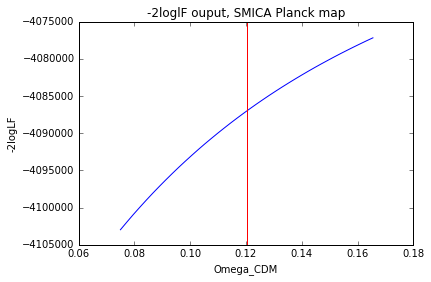

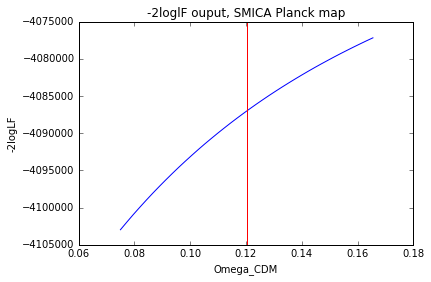

In [22]:
plt.plot(forty_samples, logLF_40)
plt.title("-2loglF ouput, SMICA Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.12029, color = 'r')


# In[ ]:


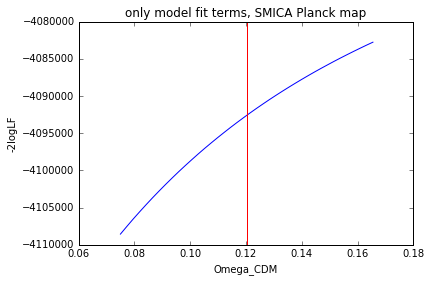

In [23]:


plt.plot(forty_samples, modelfit_terms)
plt.title("only model fit terms, SMICA Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.12029, color = 'r')



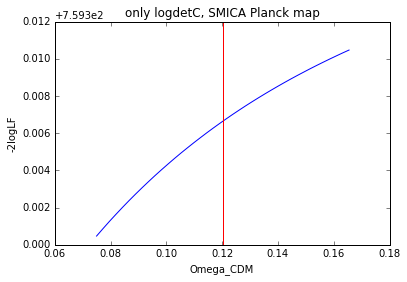

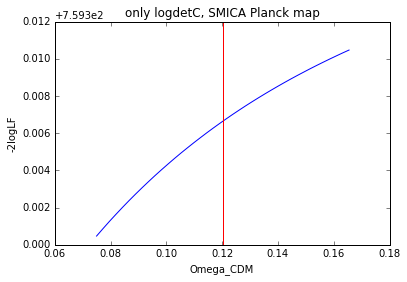

In [24]:

# In[ ]:

plt.plot(forty_samples, logdet_terms)
plt.title("only logdetC, SMICA Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.12029, color = 'r')


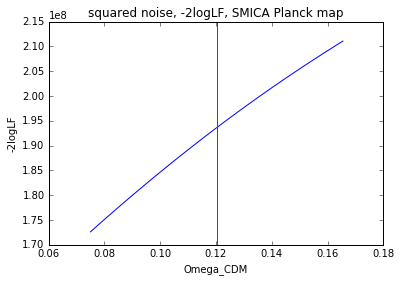

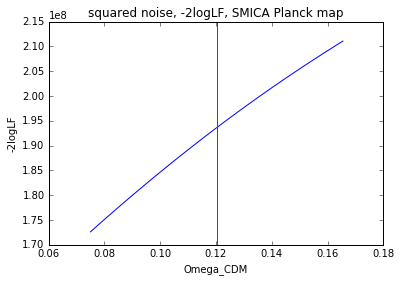

In [25]:


# In[ ]:

plt.plot(forty_samples, sqlogLF_40)
plt.title("squared noise, -2logLF, SMICA Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.12029, color = 'r')



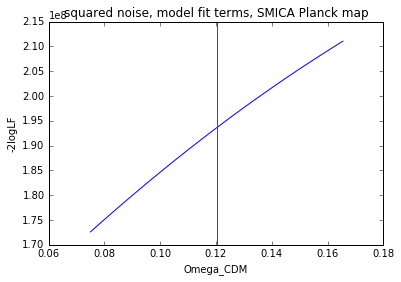

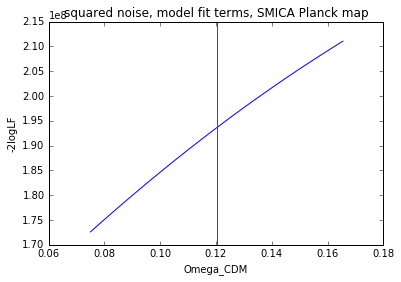

In [26]:

# In[ ]:

plt.plot(forty_samples, sqmodelfit_terms)
plt.title("squared noise, model fit terms, SMICA Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.12029, color = 'r')


# In[ ]:


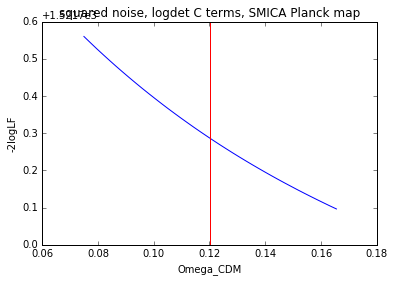

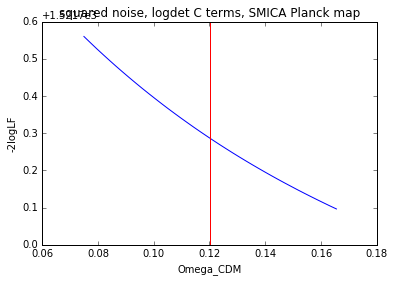

In [27]:

plt.plot(forty_samples, sqlogdet_terms)
plt.title("squared noise, logdet C terms, SMICA Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.12029, color = 'r')